### Spectral Image model v3

### Imports 

In [1]:
import os

#Data Handling
import pandas as pd
import numpy as np

#Spectral image generation
import librosa
from librosa import power_to_db
from librosa import load
from librosa.feature import melspectrogram 
from librosa.display import specshow

#Image Processing 
import cv2

#Machine & Deep Learning
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense
from keras.models import Sequential, Model

#Visualizations
import matplotlib.pyplot as plt
import warnings

#Manual testing packages
import sounddevice as sd
from scipy.io.wavfile import write

warnings.filterwarnings("ignore")

Using TensorFlow backend.


### Load spectral images into arrays

In [12]:
def create_dataset(directory,IMG_WIDTH,IMG_HEIGHT):
    X = []
    Y = [] 
    for i, (subdirs, dirs, files) in enumerate(os.walk(directory)):
        for file in files:
            if not file.startswith('.'):
                label = subdirs.split('/')[-1]
                image = cv2.imread(os.path.join(subdirs,file))
                image = cv2.resize(image,(64,64))
                X.append(image)
                Y.append(label)
    return np.array(X),np.array(Y)

In [13]:
savedir = '/Users/sahityasridhar/Documents/OS/keyword/dataset/images/'
IMG_WIDTH, IMG_HEIGHT = 64,64
X,Y = create_dataset(savedir,IMG_WIDTH,IMG_HEIGHT)

In [14]:
X.shape

(935, 64, 64, 3)

In [15]:
X = X/255.0

In [16]:
X.shape,Y.shape

((935, 64, 64, 3), (935,))

### One Hot Encode the output

In [17]:
le = LabelEncoder()
Y = le.fit_transform(Y)
NUM_CLASSES = len(le.classes_)
Y = np.eye(NUM_CLASSES)[Y]

### Train test split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=Y)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((654, 64, 64, 3), (281, 64, 64, 3), (654, 6), (281, 6))

###  Image Classification Model

In [25]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,MaxPooling2D,Dropout
from keras.models import Sequential, Model

In [26]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

W0701 14:33:13.208017 4500872640 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:127: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0701 14:33:13.223031 4500872640 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3144: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
__________

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

W0701 14:33:29.775053 4500872640 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/optimizers.py:757: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0701 14:33:29.818496 4500872640 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3014: The name tf.log is deprecated. Please use tf.math.log instead.



In [29]:
history = model.fit(X_train,y_train,batch_size=32,epochs=200,validation_split=0.2)

W0701 14:33:30.572001 4500872640 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 523 samples, validate on 131 samples
Epoch 1/200
523/523 [==============================] - 4s 7ms/step - loss: 1.8191 - acc: 0.1663 - val_loss: 1.7916 - val_acc: 0.2137
Epoch 2/200
523/523 [==============================] - 3s 6ms/step - loss: 1.7907 - acc: 0.2027 - val_loss: 1.7891 - val_acc: 0.2137
Epoch 3/200
523/523 [==============================] - 3s 5ms/step - loss: 1.7882 - acc: 0.2180 - val_loss: 1.7886 - val_acc: 0.2137
Epoch 4/200
523/523 [==============================] - 2s 5ms/step - loss: 1.7896 - acc: 0.1912 - val_loss: 1.7883 - val_acc: 0.2137
Epoch 5/200
523/523 [==============================] - 2s 5ms/step - loss: 1.7892 - acc: 0.1855 - val_loss: 1.7858 - val_acc: 0.2137
Epoch 6/200
523/523 [==============================] - 2s 5ms/step - loss: 1.7852 - acc: 0.2027 - val_loss: 1.7788 - val_acc: 0.2137
Epoch 7/200
523/523 [==============================] - 2s 5ms/step - loss: 1.7615 - acc: 0.2390 - val_loss: 1.7560 - val_acc: 0.2137
Epoch 8/200
523/523 [==

Epoch 62/200
523/523 [==============================] - 2s 5ms/step - loss: 0.2044 - acc: 0.9312 - val_loss: 0.1465 - val_acc: 0.9542
Epoch 63/200
523/523 [==============================] - 2s 5ms/step - loss: 0.2122 - acc: 0.9273 - val_loss: 0.1377 - val_acc: 0.9618
Epoch 64/200
523/523 [==============================] - 2s 4ms/step - loss: 0.2131 - acc: 0.9254 - val_loss: 0.1341 - val_acc: 0.9542
Epoch 65/200
523/523 [==============================] - 2s 4ms/step - loss: 0.2112 - acc: 0.9254 - val_loss: 0.1308 - val_acc: 0.9542
Epoch 66/200
523/523 [==============================] - 2s 5ms/step - loss: 0.1694 - acc: 0.9331 - val_loss: 0.1463 - val_acc: 0.9466
Epoch 67/200
523/523 [==============================] - 2s 5ms/step - loss: 0.1132 - acc: 0.9618 - val_loss: 0.1341 - val_acc: 0.9542
Epoch 68/200
523/523 [==============================] - 2s 4ms/step - loss: 0.1244 - acc: 0.9560 - val_loss: 0.1360 - val_acc: 0.9618
Epoch 69/200
523/523 [==============================] - 2s 4ms

Epoch 123/200
523/523 [==============================] - 2s 4ms/step - loss: 0.1333 - acc: 0.9541 - val_loss: 0.0835 - val_acc: 0.9695
Epoch 124/200
523/523 [==============================] - 2s 4ms/step - loss: 0.1067 - acc: 0.9694 - val_loss: 0.1728 - val_acc: 0.9542
Epoch 125/200
523/523 [==============================] - 2s 4ms/step - loss: 0.0767 - acc: 0.9656 - val_loss: 0.0728 - val_acc: 0.9771
Epoch 126/200
523/523 [==============================] - 2s 4ms/step - loss: 0.0705 - acc: 0.9751 - val_loss: 0.1322 - val_acc: 0.9618
Epoch 127/200
523/523 [==============================] - 2s 4ms/step - loss: 0.0993 - acc: 0.9675 - val_loss: 0.1028 - val_acc: 0.9618
Epoch 128/200
523/523 [==============================] - 2s 5ms/step - loss: 0.0762 - acc: 0.9694 - val_loss: 0.1037 - val_acc: 0.9695
Epoch 129/200
523/523 [==============================] - 2s 4ms/step - loss: 0.0454 - acc: 0.9885 - val_loss: 0.1013 - val_acc: 0.9695
Epoch 130/200
523/523 [==============================] 

### Plot Validation and Training Loss curves

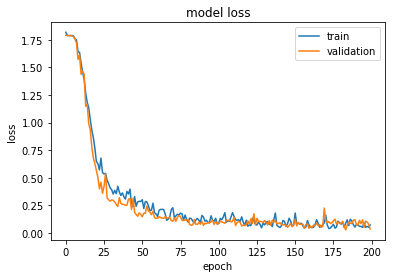

In [30]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Test Data Accuracy 

In [31]:
model.evaluate(X_test,y_test)

281/281 [==============================] - 0s 1ms/step


[0.10639147638107958, 0.9537366528952249]

In [32]:
model.evaluate(X_train,y_train)

654/654 [==============================] - 1s 1ms/step


[0.015221703893612552, 0.9938837920489296]

In [33]:
model.save('V5-best-AudioClassification')

#### Confusion Matrix of predictions

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
y_true = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(X_test),axis=1)
y_true = le.inverse_transform(y_true)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_true,y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, le.classes_, le.classes_)

#### Display Confusion Matrix

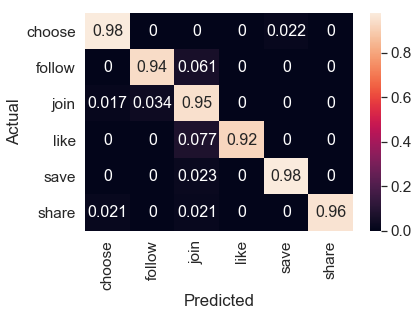

In [35]:
sn.set(font_scale=1.4) 
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) 
ax.set(xlabel = 'Predicted', ylabel='Actual')
plt.show()

#### Record and create audio file

In [81]:
fs = 44100  # this is the frequency sampling; also: 4999, 64000
seconds = 2  # Duration of recording
 
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
print("Starting: Speak now!")
sd.wait()  # Wait until recording is finished
print("finished")
write('/Users/sahityasridhar/Documents/OS/output.mp3', fs, myrecording)  # Save as WAV file

Starting: Speak now!
finished


#### Convert audio file to corresponding spectral images

In [82]:


clip, sample_rate = load('/Users/sahityasridhar/Documents/OS/output.mp3', sr=None,res_type='kaiser_fast')
fig = plt.figure(figsize=[1,1])

# This is to get rid of the axes and only get the picture 
ax = fig.add_subplot(111)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.set_frame_on(False)

# This is the melspectrogram from the decibels with a linear relationship
S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')

plt.savefig('/Users/sahityasridhar/Documents/OS/output.jpg', dpi=500, bbox_inches='tight',pad_inches=0)

plt.close()


#### Image preprocessing 

In [83]:
image = cv2.imread('/Users/sahityasridhar/Documents/OS/output.jpg')
sample = cv2.resize(image,(64,64))
sample = sample/255.0
os.remove('/Users/sahityasridhar/Documents/OS/output.jpg')

In [84]:
sample.shape
sample = sample.reshape(1,sample.shape[0],sample.shape[1],sample.shape[2])

#### Retrieve predictions

In [85]:
result = model.predict_classes(sample)

In [86]:
print(result,le.classes_[result])

[1] ['follow']
